# 1. Import Libraries
We import Python libraries for:
- Data analysis (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Machine Learning models (`Logistic Regression`, `Naïve Bayes`, `Random Forest`)
- AutoML (`PyCaret`)


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [6]:
%pip install pycaret

from pycaret.classification import setup, compare_models, pull



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Load Dataset
We use the Pima Indians Diabetes dataset.  
It contains medical measurements (e.g., glucose, BMI, insulin) and the target variable `Outcome`:
- `0` → No Diabetes
- `1` → Diabetes


In [ ]:

df = pd.read_csv("../data/diabetes.csv")  # make sure file is inside `data/` folder
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
print("Dataset Shape:", df.shape)
print("Number of diabetic patients:", df['Outcome'].sum())
print("Number of non-diabetic patients:", (df['Outcome'] == 0).sum())


Dataset Shape: (768, 9)
Number of diabetic patients: 268
Number of non-diabetic patients: 500


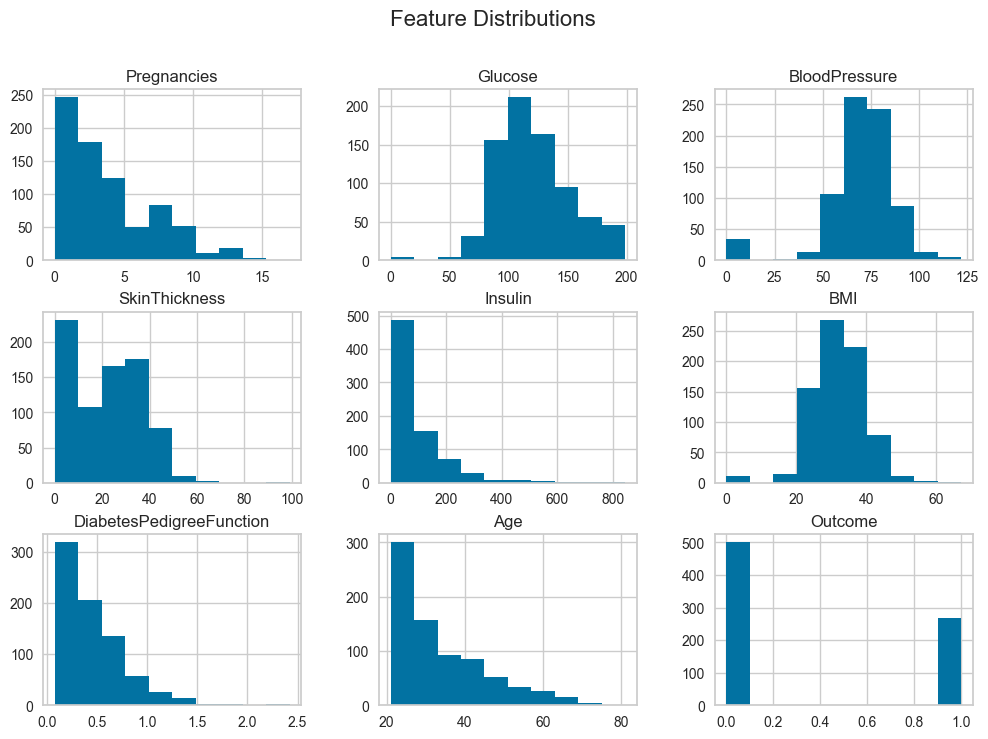

In [17]:
df.hist(figsize=(12,8))
plt.suptitle("Feature Distributions", size=16)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


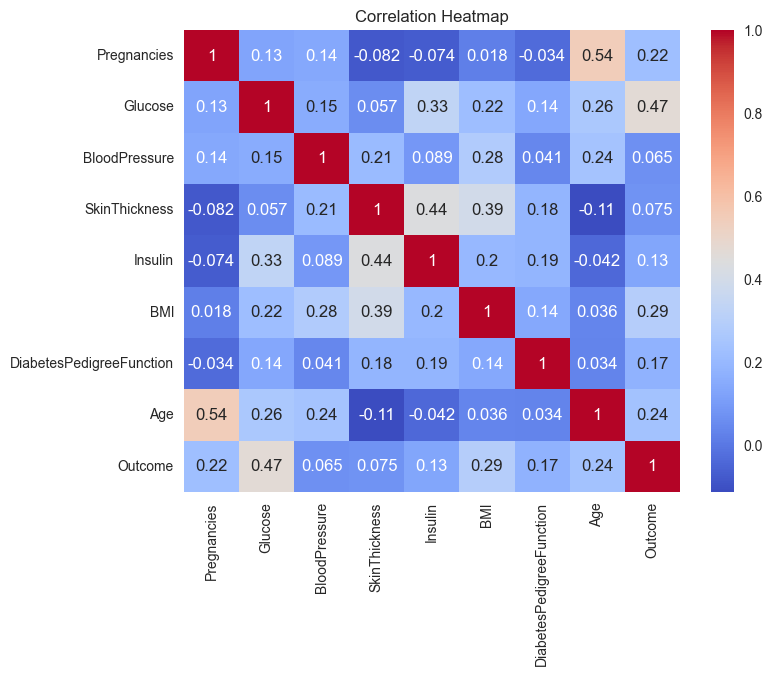

In [8]:
# ================================================
# 3. 🔍 Data Cleaning & EDA
# ================================================
df.info()
df.describe()

# Handle missing values if any
df = df.dropna()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Observations:**
- Glucose has strong correlation with `Outcome`
- Age and BMI also show visible differences between diabetic and non-diabetic groups
- Dataset has no missing values after cleaning


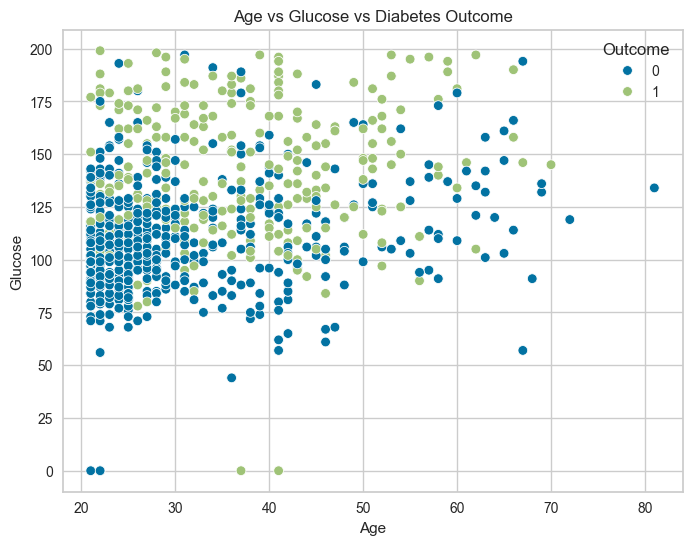

In [9]:
# Age vs Glucose vs Outcome
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=df)
plt.title("Age vs Glucose vs Diabetes Outcome")
plt.show()

# 4. Modeling

1. Logistic Regression – interpretable, good baseline  
2. Naïve Bayes – probabilistic model  
3. Random Forest – ensemble, usually performs best


In [10]:
# ================================================
# 4. 🤖 Modeling
# ================================================
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7467532467532467


In [11]:
# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7662337662337663


In [12]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7597402597402597


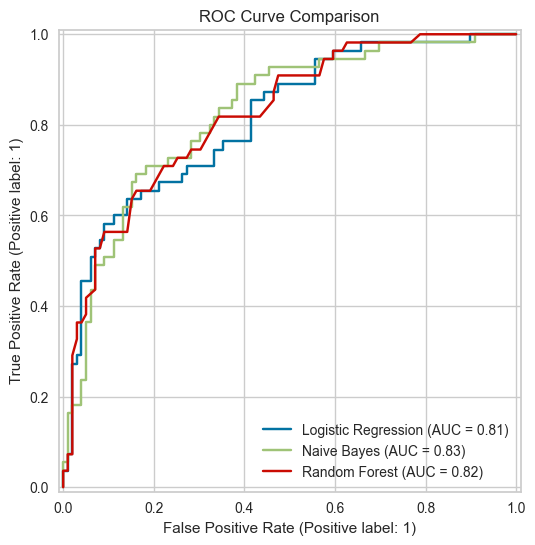

In [21]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,6))
for name, model in [("Logistic Regression", lr), ("Naive Bayes", nb), ("Random Forest", rf)]:
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
plt.title("ROC Curve Comparison")
plt.show()


In [23]:
# ================================================
# 5. 📊 Evaluation Metrics
# ================================================
models = {"Logistic Regression": y_pred_lr,
          "Naive Bayes": y_pred_nb,
          "Random Forest": y_pred_rf}

for name, preds in models.items():
    print(f"\n📌 {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


📌 Logistic Regression
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
Confusion Matrix:
 [[78 21]
 [18 37]]

📌 Naive Bayes
Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091
Confusion Matrix:
 [[79 20]
 [16 39]]

📌 Random Forest
Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
Confusion Matrix:
 [[81 18]
 [19 36]]


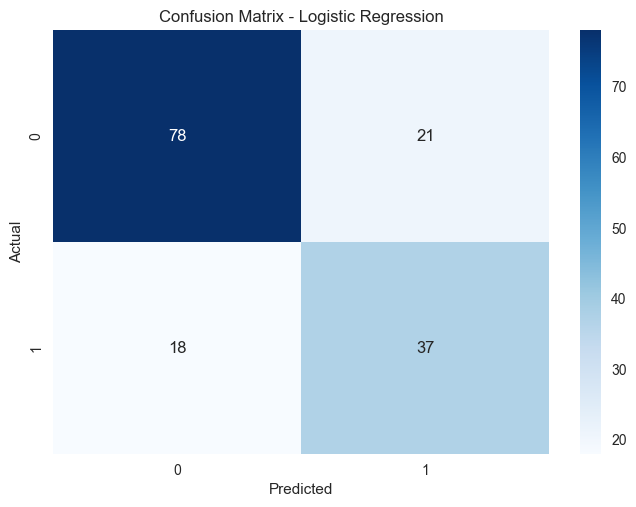

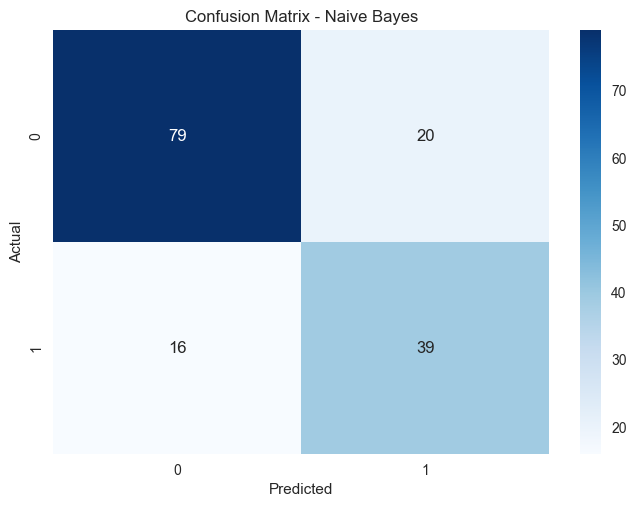

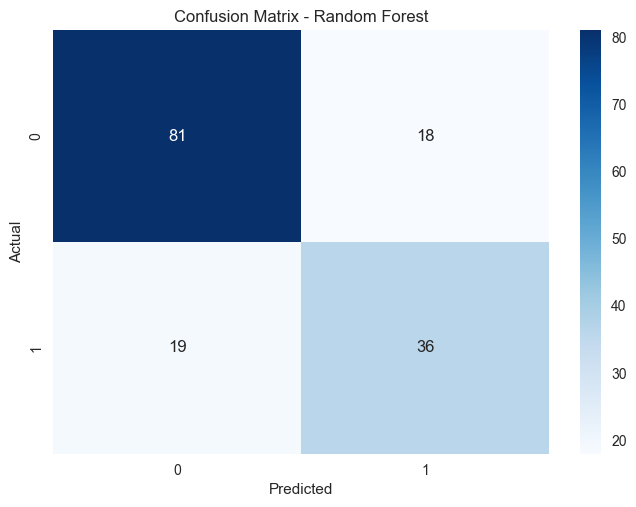

In [24]:
for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# 6. AutoML with PyCaret
We use PyCaret to quickly compare multiple models and select the best performer automatically.


In [15]:
# ================================================
# 6. 🤖 AutoML with PyCaret
# ================================================
s = setup(data=df, target="Outcome",session_id=42)
best_model = compare_models()
results = pull()  # model comparison table
results

,Description,Value
0,Session id,42
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7784,0.8284,0.5819,0.7369,0.6397,0.4851,0.4994,1.9570
lda,Linear Discriminant Analysis,0.7784,0.8304,0.5819,0.7327,0.6395,0.4848,0.4977,0.0270
ridge,Ridge Classifier,0.7747,0.8306,0.5661,0.7344,0.6297,0.4740,0.4883,0.0390
nb,Naive Bayes,0.7599,0.8160,0.5930,0.6858,0.6275,0.4537,0.4616,0.0340
qda,Quadratic Discriminant Analysis,0.7525,0.8166,0.5775,0.6718,0.6149,0.4356,0.4424,0.0310
et,Extra Trees Classifier,0.7524,0.8100,0.5605,0.6824,0.5995,0.4275,0.4427,0.1740
gbc,Gradient Boosting Classifier,0.7449,0.8166,0.5398,0.6773,0.5874,0.4096,0.4239,0.1450
rf,Random Forest Classifier,0.7393,0.8114,0.5401,0.6601,0.5857,0.4005,0.4101,0.2100
ada,Ada Boost Classifier,0.7336,0.7854,0.5398,0.6396,0.5749,0.3865,0.3961,0.1040
lightgbm,Light Gradient Boosting Machine,0.7225,0.7811,0.5506,0.6231,0.5779,0.3739,0.3804,0.4130


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7784,0.8284,0.5819,0.7369,0.6397,0.4851,0.4994,1.957
lda,Linear Discriminant Analysis,0.7784,0.8304,0.5819,0.7327,0.6395,0.4848,0.4977,0.027
ridge,Ridge Classifier,0.7747,0.8306,0.5661,0.7344,0.6297,0.4740,0.4883,0.039
nb,Naive Bayes,0.7599,0.8160,0.5930,0.6858,0.6275,0.4537,0.4616,0.034
qda,Quadratic Discriminant Analysis,0.7525,0.8166,0.5775,0.6718,0.6149,0.4356,0.4424,0.031
et,Extra Trees Classifier,0.7524,0.8100,0.5605,0.6824,0.5995,0.4275,0.4427,0.174
gbc,Gradient Boosting Classifier,0.7449,0.8166,0.5398,0.6773,0.5874,0.4096,0.4239,0.145
rf,Random Forest Classifier,0.7393,0.8114,0.5401,0.6601,0.5857,0.4005,0.4101,0.210
ada,Ada Boost Classifier,0.7336,0.7854,0.5398,0.6396,0.5749,0.3865,0.3961,0.104
lightgbm,Light Gradient Boosting Machine,0.7225,0.7811,0.5506,0.6231,0.5779,0.3739,0.3804,0.413


In [28]:
from pycaret.classification import save_model

# after best_model = compare_models()
save_model(best_model, "../models/best_diabetes_model")




Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 (...
          

In [29]:
from pycaret.classification import load_model
best_model = load_model("../models/best_diabetes_model")


Transformation Pipeline and Model Successfully Loaded


In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Collect results
results = []
for name, model in {"Logistic Regression": lr, "Naive Bayes": nb, "Random Forest": rf}.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.746753,0.637931,0.672727,0.654867,0.812856
1,Naive Bayes,0.766234,0.661017,0.709091,0.684211,0.825344
2,Random Forest,0.759740,0.666667,0.654545,0.660550,0.823140


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

for name, model in {"Logistic Regression": lr, "Naive Bayes": nb, "Random Forest": rf}.items():
    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.savefig(f"../reports/{name}_confusion_matrix.png")
    plt.close()

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} - ROC Curve")
    plt.savefig(f"../reports/{name}_roc_curve.png")
    plt.close()


In [38]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# PDF path
pdf_path = "../reports/model_results.pdf"
doc = SimpleDocTemplate(pdf_path)
styles = getSampleStyleSheet()
story = []

story.append(Paragraph("📊 Model Evaluation Results", styles["Title"]))
story.append(Spacer(1, 20))

# Models dictionary
models = {
    "Logistic Regression": lr,
    "Naive Bayes": nb,
    "Random Forest": rf
}

# =============================
# 1. Create Comparison Table
# =============================
table_data = [["Model", "Accuracy", "Precision", "Recall", "F1 Score"]]

metrics_dict = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_dict[name] = (acc, prec, rec, f1)

    table_data.append([name, f"{acc:.4f}", f"{prec:.4f}", f"{rec:.4f}", f"{f1:.4f}"])

table = Table(table_data, colWidths=[150, 80, 80, 80, 80])
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
]))
story.append(table)
story.append(Spacer(1, 30))

# =============================
# 2. Detailed Sections per Model
# =============================
for name, model in models.items():
    story.append(Paragraph(f"<b>{name}</b>", styles["Heading2"]))
    acc, prec, rec, f1 = metrics_dict[name]

    metrics_text = f"""
    <br/>Accuracy: {acc:.4f}
    <br/>Precision: {prec:.4f}
    <br/>Recall: {rec:.4f}
    <br/>F1 Score: {f1:.4f}
    """
    story.append(Paragraph(metrics_text, styles["Normal"]))
    story.append(Spacer(1, 12))

    story.append(Paragraph("Confusion Matrix:", styles["Normal"]))
    story.append(Image(f"../plots/{name}_confusion_matrix.png", width=400, height=300))
    story.append(Spacer(1, 12))

    story.append(Paragraph("ROC Curve:", styles["Normal"]))
    story.append(Image(f"../plots/{name}_roc_curve.png", width=400, height=300))
    story.append(Spacer(1, 20))

# =============================
# 3. Best Model Summary
# =============================
best_model = max(metrics_dict.items(), key=lambda x: x[1][0])  
best_name, (best_acc, best_prec, best_rec, best_f1) = best_model  

story.append(Spacer(1, 40))
story.append(Paragraph("🏆 Best Model Summary", styles["Heading2"]))
summary_text = f"""
Based on evaluation metrics, the best performing model is 
<b>{best_name}</b> with an accuracy of <b>{best_acc:.4f}</b>.  
It also achieved precision = {best_prec:.4f}, recall = {best_rec:.4f}, and F1 score = {best_f1:.4f}.  

👉 This model is recommended as the final choice for deployment.
"""
story.append(Paragraph(summary_text, styles["Normal"]))

# Build PDF
doc.build(story)
print(f"✅ PDF report saved to {pdf_path}")


✅ PDF report saved to ../reports/model_results.pdf
